In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install numpy==1.26


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from nltk import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, classification_report

from keras.models import Model, load_model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from the correct location
#from keras.preprocessing.sequence import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
datal = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/camerounaise_spam_data.xlsx'))
#datal = datal = pd.read_csv('/content/drive/MyDrive/smsspamcollection/spam.csv',encoding='latin-1')

scale_mapped={
    'Spam':1.0,
    'spam':1.0,
    'ham':0.0,
    'h':0.0
}

datal.rename(columns = {'v1':'label','v2':'SMS'},inplace=True)
# Checking the rows and columns(m*n)
data = (datal[['label','SMS']].dropna().reset_index(drop=True)).sample(frac = 1)
data_label= data['label'].replace(scale_mapped)
print(len(data))
# Checking for the nulls
data.info()
# Re-Checking for nulls
data.isnull().sum()
# Row-wise all values are displayed
data.values

22788
<class 'pandas.core.frame.DataFrame'>
Index: 22788 entries, 6954 to 5731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   22788 non-null  object
 1   SMS     22788 non-null  object
dtypes: object(2)
memory usage: 534.1+ KB


<ipython-input-3-ac5504010e94>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_label= data['label'].replace(scale_mapped)


array([['ham',
        'Missa vient pardon il risque avoir bagarre d présentation ici'],
       ['ham',
        'Et que mes gaufres soient chaudes à ce moment là avec du chocolat'],
       ['ham',
        "Vous, MOISE LOIC YOUMBI WOUWE (237679196389) avez effectue avec succes le retrait de 1780 FCFA de votre compte mobile money, chez  BUSNESCO LONTCHI TCHINDA VOLTAIRE le 2021-11-09 19:33:05. Transaction Id: 3197742728. Votre nouveau solde est 70. Frais 30. Jusqu'au 31 octobre, recois jusqua 100% de remboursement sur tous tes paiements via MoMo."],
       ...,
       ['ham', 'On me dit que la coiffure paye bien laba'],
       ['ham',
        "Simon va au tableau tu commences par l exo 1 j'ai pas fini les calculs"],
       ['ham', "Okay c'est ta décision"]], dtype=object)

In [ ]:
data.head()

,label,SMS
6954,ham,Missa vient pardon il risque avoir bagarre d p...
11952,ham,Et que mes gaufres soient chaudes à ce moment ...
4513,ham,"Vous, MOISE LOIC YOUMBI WOUWE (237679196389) a..."
5426,ham,On peut fixer la sanction à n'importe combien ...
544,ham,Dinayen Weti di do you for sharp


In [ ]:
# prompt: Avec le DataFrame data:

# Count the number of spam and ham messages
data['label'].value_counts()

,count
label,
ham,19308
spam,3480


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

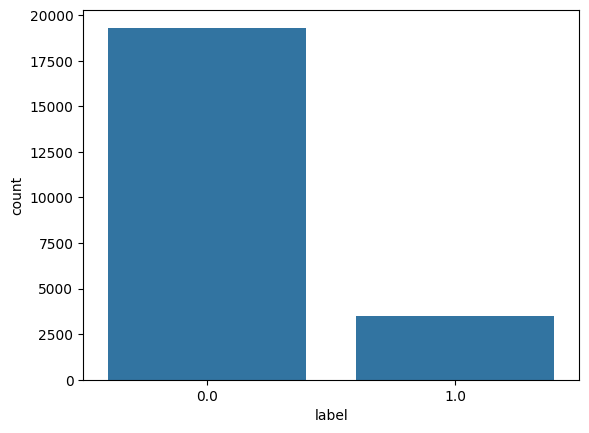

In [ ]:

sns.countplot(x=data_label)
plt.show()

In [ ]:
#l_2024_Y_2023
spam = 0
ham = 0
taille=20630
for e in data_label:
  if e == 1.0:
    spam +=1
  else:
    ham +=1
print(ham + spam)
print(spam/taille)
print(ham/taille)
print(spam)
print(ham)

22788
0.16868637905962192
0.935918565196316
3480
19308


In [ ]:
# Libraries needed for NLP
import nltk
import re

# Stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Stemmers
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install fasttext

In [ ]:
import fasttext

PRETRAINED_MODEL_PATH = '/content/drive/MyDrive/lid.176.bin'
model_fastext = fasttext.load_model(PRETRAINED_MODEL_PATH)

In [ ]:
import pandas as pd
from collections import Counter
import re

# Charger les données
df = pd.read_excel('/content/drive/MyDrive/camerounaise_spam_data.xlsx')

# Liste des mots à exclure
mots = set([
    mot.lower() for mot in [
        "Di", "Weri", "Dem di", "Wuna", "Putam", "Banda", "Trowayam", "Puttam", "Livam", "Comot", "choppam", "Wonna",
        "Ayayaaaaaaa", "Ayaaaaaaaah", "Ayaaa", "MTN Elite one", "ELITE", "MTN Elite two", "MTN HEMLE",
        "MoMo", "Njangi", "Anti-zamba", "banga", "Aka", "Abek", "MTN WANDA",
        "Chop", "Gi", "Wan", "Commot", "Bros", "Fit", "Chopam", "Chain", "Pa", "Yea", "Aseh",
        "Doppel", "Anzouer", "Noc", "mi", "tchake", "mop", "pikin", "grandmami",
        "combo", "mami", "geh", "waka", "beta", "drama", "fancy", "joking", "grandma", "djongle", "pu",
        "kiffé", "chinchingas", "chap", "odontol", "bissap", "bhb", "mbongo", "tchobi", "koki", "boh",
        "takou", "bayam", "sellam", "djangui", "tiya", "pen", "jougah", "ngess", "eza", "ya",
        "joga", "dinguer", "kongosa", "beg", "gato", "sidon", "wanda", "far", "relax", "pian",
        "chinchinga", "won", "soya", "aboubakar", "una", "moto", "gare", "bacongo", "kpatou", "shabba",
        "tchakala", "binguiste", "leker", "tapioca", "vex", "mbole", "broda", "camerounaiseries", "gaou",
        "kilichi", "big", "bindi", "nyanga", "matter", "ndole", "abeg", "makossa", "fufu", "massa",
        "zele", "wahala", "mimbo", "dat", "garri", "kmer", "choko", "tantie", "Makala", "wetin", "sabi",
        "dem", "tiyam", "talkam", "ndjooh", "hemle", "damba", "Yeuch", "massah", "YELLOWBET", "TCHA",
        "DOS", "ZIK", "CAMWATER", "beleh", "Weh", "Wer", "way", "Waouh", "tata",
        "CAMTEL", "tchop", "avt", "blem", "pb", "Aseeyyyy", "gonna", "Big", "boycottam", "eske", "na", "etw", "ke",
        "papahh", "owooo", "Ekounou", "Ur", "chop", "weti", "norhhhh", "wahhh", "mop", "top", "Blue", "don", "mama",
        "gonna", "ohh", "wehh", "una", "di", "do am", "so na", "pundit", "goss", "noooooor", "OrangeMoney", "Orange Pawa3",
        "Orange Pawa2", "CONTROLLER", "RINYU", "ZIK", "Dnc", "Nah", "dey", "Ateyu", "mammy", "Bali", "ei go", "no man",
        "no miss", "u dey", "le school", "Asay ehhh", "Yde", "Abeg", "di fes", "Dion", "dey for night", "aunty",
        "OrangeMoneyAfrica", "ei no go dey", "ei chop eh", "Till", "no Dey", "duty", "meuf", "bah", "go dey", "U",
        "njooh", "Orange Bonus data", "I b", "I go", "CALL BOX", "Wuna", "Moppppp sooooo", "wouyyyyy", "ie go day",
        "djemble", "Na so ma", "o skul", "commot", "beignet bouilli", "banane malaxée", "I be", "ein", "stp", "abec",
        "di fear", "say nah", "no get", "pickam", "I b gold", "Fes", "baddddd", "beggam", "apoutchou", "cmmt", "no be",
        "Blue Go", "Max it", "yah house", "fes chop", "I Di", "Presi", "I don go", "I go d", "I cm", "u no d",
        "I dey dey", "don", "Abeg", "wuna", "ya", "I d", "bn", "ps", "U b", "u dey", "D pikin", "D", "pikin", "dem",
        "go", "c", "me", "huz", "na", "ehhhh", "yah", "Djimassa", "u wan"
    ]
])

# Initialiser le compteur
word_counter = Counter()

# Créer une nouvelle colonne nettoyée
def nettoyer_texte(texte):
    if pd.isna(texte):
        return texte
    texte = str(texte).lower()
    mots_ligne = re.findall(r'\b[\w\-]+\b', texte)
    mots_filtrés = [mot for mot in mots_ligne if mot not in mots]
    # Mise à jour du compteur
    for mot in mots_ligne:
        if mot in mots:
            word_counter[mot] += 1
    return ' '.join(mots_filtrés)

# Appliquer le nettoyage
data['SMS'] = data['SMS'].apply(nettoyer_texte)

# Affichage des résultats
for mot, count in word_counter.most_common():
    print(f"{mot}: {count}")

# Mots jamais trouvés
non_trouves = mots - word_counter.keys()
print("\nMots jamais trouvés :")
for mot in sorted(non_trouves):
    print(mot)

# Total des occurrences supprimées
total_occurrences = sum(word_counter.values())
print(f"\nNombre total d'occurrences supprimées : {total_occurrences}")

# Enregistrer le fichier nettoyé si souhaité
# df.to_excel('/content/drive/MyDrive/camerounaise_spam_data_clean.xlsx', index=False)


d: 3309
c: 2695
camtel: 856
me: 841
go: 700
na: 446
u: 431
momo: 337
di: 324
don: 300
wanda: 259
ke: 203
stp: 191
blue: 185
ya: 174
dey: 158
zik: 146
way: 115
dem: 77
chop: 70
elite: 67
abeg: 66
fit: 65
wuna: 64
pb: 54
massa: 52
top: 51
ur: 47
pu: 38
noc: 37
njooh: 36
orangemoney: 35
big: 34
una: 32
nah: 32
ndjooh: 30
dat: 30
pa: 28
moto: 28
hemle: 27
mama: 26
damba: 25
yde: 25
wan: 24
ekounou: 24
won: 24
weh: 24
ohh: 22
comot: 22
till: 21
talkam: 21
matter: 21
massah: 19
sabi: 19
far: 18
banda: 18
tiyam: 18
pikin: 18
weti: 15
mop: 15
ein: 14
wetin: 14
camwater: 14
fes: 13
njangi: 13
tata: 13
tchop: 13
yah: 13
controller: 13
ps: 12
orangemoneyafrica: 12
makala: 12
abec: 11
kmer: 11
fufu: 11
waka: 11
tcha: 10
dion: 10
tantie: 10
beg: 10
presi: 10
wahala: 10
gonna: 10
waouh: 9
rinyu: 9
mimbo: 9
makossa: 9
wer: 8
garri: 8
vex: 8
choko: 8
meuf: 7
wonna: 7
commot: 7
mami: 6
aka: 6
bn: 6
aseh: 6
broda: 6
eske: 6
norhhhh: 6
doppel: 6
bindi: 6
nyanga: 5
apoutchou: 5
bah: 5
mi: 5
gi: 5
aunty: 5

adresse email correcte

In [ ]:
data_sms = []
text = []
# Store it in a variable
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
# Cleanup
# Store it in a variable
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def clean_data_en(text):
  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
  # replace email address with 'emailaddress'
  text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", r'emailadress ', str(text))
  # replace urls with 'webaddress'
  #text = re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,6}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", r'webaddress', str(text))
  text = re.sub(r"(https?|ftp)://[^\s/$.?#].[^\s]*", r'webaddress', str(text))
  text = re.sub( r'\b(?:https?:\/\/)?(?:\*?\w+\*?\s*)?(bit\.ly|eianal\.com|onelink\.to|viaonelink\.to|cutt\.ly)\/[^\s]*\b', r'webaddress', str(text))
  # replace 10 digit phone number with 'phone-number'
  #text =  re.sub('(?:\d{8}(?:\d{2}(?:\d{2})?)?|\(\+?\d{2,3}\)\s?(?:\d{4}[\s*.-]?\d{4}|\d{3}[\s*.-]?\d{3}|\d{2}([\s*.-]?)\d{2}\1\d{2}(?:\1\d{2})?))', r'phone-number', text)
  text =  re.sub( r'(?:\+?237|00237|237)?[ -*./]*(6[235-9][ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2}|[1-9][ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2})', r'phoneNumber', text)
  text = re.sub(r'\b\d[\d\s,\.]*\s*(FCFA|F|fr|fcf|f|fcfa|xfa|XFA|u|U)\b', r' money ', text)
  #text = re.sub('[\d]{1,10}fcfa|[\d]{1,10}FCFA|[\d]{1,10}Fr|[\d]{1,10}fr|[\d]{1,10}FCFA|[\d]{1,10} fcfa|[\d]{1,10} FCFA|[\d]{1,10} Fr|[\d]{1,10} fr', r' money ', text)
  # remove punctuation
  text=re.sub('[^\w\d\s]', r' ',text)
  # remove whitespace between terms with single space
  text = re.sub('\s+', r' ', text)
  # remove leading and trailing whitespace
  text = re.sub('^\s+|\s*?$', r' ',text)
  # change words to lower case
  text = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' url ', text)
  text = re.sub(r'(?:\+?237|00237|237)? *(6[235-9] *[0-9]{7}|[1-9] *[0-9]{7})', r' phoneNumber ', text)
  text = re.sub('[\d]{1,10}GO|[\d]{1,10}Go|[\d]{1,10}gO|[\d]{1,10}go|[\d]{1,10} GO|[\d]{1,10} Go|[\d]{1,10} gO|[\d]{1,10} go', r' dataConnexion ', text)
  text = re.sub('([http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)| (https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r'webaddress', text)
  # replace normal number with 'number'
  text = re.sub('\d+(\.\d+)?', r'Nombre ', text)
  text = text.lower()
  return text

def clean_data_fr(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
      and remove words containing numbers.'''
    # replace email address with 'emailaddress'
    text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", r'adresseemail ', str(text))
    # replace urls with 'webaddress'
    text = re.sub( r"(https?|ftp)://[^\s/$.?#].[^\s]*", r'adresseweb ', str(text))
    text = re.sub( r'\b(?:https?:\/\/)?(?:\*?\w+\*?\s*)?(bit\.ly|eianal\.com|onelink\.to|viaonelink\.to|cutt\.ly)\/[^\s]*\b', r'adresseweb ', str(text))
    # replace 10 digit phone number with 'phone-number'
    text =  re.sub(r'(?:\+?237|00237|237)?[ -*./]*(6[235-9][ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2}|[1-9][ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2})', r'phoneNumber ', text)
    text = re.sub(r'\b\d[\d\s,\.]*\s*(FCFA|F|fr|fcf|f|fcfa|xfa|XFA|u|U)\b', r' argent ', text)
    #text = re.sub('[\d]{1,10}fcfa|[\d]{1,10}FCFA|[\d]{1,10}Fr|[\d]{1,10}fr|[\d]{1,10}FCFA|[\d]{1,10} fcfa|[\d]{1,10} FCFA|[\d]{1,10} Fr|[\d]{1,10} fr', r' argent ', text)
    # remove punctuation
    text=re.sub('[^\w\d\s]', r' ',text)
    # remove whitespace between terms with single space
    text = re.sub('\s+', r' ', text)
    # remove leading and trailing whitespace
    text = re.sub('^\s+|\s*?$', r' ',text)
    # change words to lower case
    text = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' url ', text)
    text = re.sub('(00237[1-9] *[0-9]{8}|\+237[1-9] *[0-9]{8}|(237[1-9] *[0-9]{8})|(6[2|3|5-9] *[0-9]{7}))', r' numeroTelephone ', text)
    text = re.sub('[\d]{1,10}GO|[\d]{1,10}Go|[\d]{1,10}gO|[\d]{1,10}go|[\d]{1,10} GO|[\d]{1,10} Go|[\d]{1,10} gO|[\d]{1,10} go', r' donneeInternet ', text)
    text = re.sub('([http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)| (https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' adresseWeb ', text)
    # replace normal number with 'number'
    text = re.sub('\d+(\.\d+)?', r'Nombre ', text)
    text = text.lower()
    return text


In [ ]:
    from nltk.corpus import stopwords

    more_stopwords = ['u', 'im', 'c']
    englishStopWord = stopwords.words("english")
    frenchStopWord = stopwords.words("french")
    englishStopWord = stopwords.words("english") + more_stopwords
    french_english =  englishStopWord +frenchStopWord
    def testFuncOld(text):
        text = ' '.join([word for word in text.split() if word not in englishStopWord])
        return text

    def testFrenchEnglish(text):
        text = ' '.join([word for word in text.split() if word not in french_english])
        return text

    def testFuncNew(text):
        text = ' '.join([word for word in text.split() if word not in text])
        return text

        #remove french stop wo13/02/2023, 09:54 - +237 99824722: rd
    def testFuncOldFrench(text):
        text = ' '.join([word for word in text.split() if word not in stopwords.words("french")])
        return text

    def testFuncNewFrench(text):
        text = ' '.join([word for word in text.split() if word not in text])
        return text

    def eliminer(text):
      text = str(text).replace('\n', ' ')
      predictions = model_fastext.predict(text.replace('\n', ' ').replace('\r', ' '))
      if predictions[0][0] == '__label__fr':
        text = clean_data_fr(text)
        text = testFuncOldFrench(text)
      elif predictions[0][0] == '__label__en':
        text = clean_data_en(text)
        text = testFuncOld(text)
      else:
        clean_data_en(text)
        text = clean_data_fr(text)
        text = testFrenchEnglish(text)
      return text


In [ ]:
!pip install numpy==1.26.4 # Install a compatible NumPy version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
data['SMS']= data["SMS"].apply(eliminer)

In [ ]:
def spliter(text):
  return str(text).split()
data['SMS']=data['SMS'].apply(spliter)
print(data['SMS'][0])

['yvana', 'dors', 'prdn']


In [ ]:
for e in data['SMS']:
  if len(e)>100:
    print(len(e))

152
178
112
104
108
174
113


In [ ]:
# Trouver les index des messages dont la longueur dépasse 100 caractères
long_messages_indexes = data['SMS'][data['SMS'].str.len() > 100].index
print("Index des messages longs :", long_messages_indexes)



Index des messages longs : Index([6936, 18561, 17199, 13627, 4488, 3943, 16001], dtype='int64')


In [ ]:
# Liste des index à supprimer manuellement (messages indésirables)
indices_to_remove = [6936, 18561, 17199, 13627, 4488, 3943, 16001]

# Suppression des messages correspondant à ces index dans 'data'
data = data.drop(indices_to_remove)



print("Messages et étiquettes supprimés avec succès.")

Messages et étiquettes supprimés avec succès.


In [ ]:
for e in data['SMS']:
  if len(e)>80:
    print(len(e))

87
96
100
89
89


In [ ]:
data_label= data['label'].replace(scale_mapped)
print(len(data_label))
print(len(data['SMS']))
print(len(data))

22781
22781
22781


<ipython-input-22-925b6baad0c3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_label= data['label'].replace(scale_mapped)


In [ ]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import re
import string
from glob import glob
import os
from os.path import basename
from pathlib import Path
from os import listdir
from os.path import isfile, join
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile

for epoch in range(50):
    model_wv = Word2Vec(data['SMS'], window=7, vector_size=100,min_count=1, workers=4)
    fname = get_tmpfile("/content/drive/MyDrive/w2v/vectors.kv")
    model_wv.wv.save(fname)



KeyboardInterrupt: 

In [ ]:
l = model_wv.wv.most_similar(positive=['massa'], topn=5)
print(l)
print("cv_to_matrix model saved")

KeyError: "Key 'massa' not present in vocabulary"

In [ ]:
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sys
import random
import itertools
from os import listdir
import os
#import re
import string
from glob import glob
from os.path import isfile, join, isdir
from pathlib import Path
from gensim.models import KeyedVectors
#import json
!pip install gensim.test.utils.
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
#from gensim.test.utils import get_tmpfileevery
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

#from nltk.tokenize import word_tokenize
#import tensorflow as tf
import numpy as np
np.set_printoptions(precision=8)
wv = KeyedVectors.load("/content/drive/MyDrive/w2v/vectors.kv", mmap='r')

ERROR: Invalid requirement: 'gensim.test.utils.': Expected end or semicolon (after name and no valid version specifier)
    gensim.test.utils.
                     ^


In [ ]:
def w2v(text):
  text = [wv[str(e)] for e in text]
  return text


In [ ]:
data['SMS'] = data['SMS'].apply(w2v)

In [ ]:
data_wv = data['SMS']
print(len(data_wv[0]))

3


In [ ]:
taille = 96
from keras.utils import pad_sequences
from tensorflow import keras
max_sequence_length = taille
data1 = pad_sequences(data_wv, maxlen=max_sequence_length)

In [ ]:
#import numpy as np

#taille = 100
#text = []

#def completer(e):
#  if len(e) < 100:
#    for i in range(len(e), 100):
#      e.append(0.0)  # Pad with zeros
#  else:
#    e = e[:100]  # Truncate to a fixed length
#  return e




In [ ]:
import numpy as np

taille = 96
text = []

def completer(text):
    if len(text) < taille:
        for e in range(len(text), taille):
            text.append(np.array([0 for i in range(0, 100)]).astype(np.float32))




In [ ]:
tab_comp =np.array([0 for i in range(0, 100)]).astype(np.float32)
tableau_final_complet = []
for e in data['SMS']:
  if(len(e)<100):
    for i in range(len(e), taille):
      e.append(np.array(tab_comp))
  #else:
       # Modification : réduction des éléments à 100
  #    for e in range(len(text)):
  #         text[e] = text[e][:100]  # Réduit chaque élément à une longueur de 100
  print(len(e))
  tableau_final_complet.append(np.array(e).astype(np.float32))

Streaming output truncated to the last 5000 lines.
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
9

In [ ]:
data1 = data['SMS'].apply(completer)

In [ ]:
data_wv = data_wv.apply(completer)

In [ ]:
# @title Titre par défaut
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils import pad_sequences # Import pad_sequences

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
y=[]
batch_size = 2
n_epochs = 8
n_taille = 22775
y = [np.asarray(element).astype(np.float32) for element in data_label[:n_taille]]
x = [np.array(element).astype(np.float32) for element in data['SMS'][:n_taille]]

# Pad sequences to ensure consistent shape
max_sequence_length = 96  # Or whatever your desired maximum length is
x = pad_sequences(x, maxlen=max_sequence_length, padding='post', truncating='post') # Pad and truncate sequences

x = np.array(x)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cb6b4149d1a32b3563a0a583562cbf9209d67133f63d36d1c53974e3107f0309
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:

from lime.lime_text import LimeTextExplainer
model = Sequential()
model.add(layers.Conv1D(filters=96, kernel_size=50,activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Flatten())
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train, y_train , epochs=n_epochs, verbose=True, validation_data=(X_test,y_test), batch_size=batch_size)
explainer = LimeTextExplainer(class_names=[0,1])
model.summary()
print(history)
loss, accuracy = model.evaluate(X_train , y_train , verbose=False)
#print("************************Results for class :"+str(curr_class)+"*********************")
print("Training Accuracy: {:.8f}".format(accuracy))
print("ok")
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.8f}".format(accuracy))

Epoch 1/8
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 129s 14ms/step - accuracy: 0.9578 - loss: 0.1378 - val_accuracy: 0.9745 - val_loss: 0.0804
Epoch 2/8
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 131s 12ms/step - accuracy: 0.9803 - loss: 0.0655 - val_accuracy: 0.9765 - val_loss: 0.0750
Epoch 3/8
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 141s 12ms/step - accuracy: 0.9830 - loss: 0.0547 - val_accuracy: 0.9820 - val_loss: 0.0589
Epoch 4/8
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 111s 12ms/step - accuracy: 0.9857 - loss: 0.0478 - val_accuracy: 0.9829 - val_loss: 0.0603
Epoch 5/8
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 144s 12ms/step - accuracy: 0.9890 - loss: 0.0355 - val_accuracy: 0.9844 - val_loss: 0.0458
Epoch 6/8
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 141s 12ms/step - accuracy: 0.9918 - loss: 0.0298 - val_accuracy: 0.9835 - val_loss: 0.0655
Epoch 7/8
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - accuracy: 0.9939 - loss: 0.0233 - val_accuracy: 0.9851 - val_loss: 0.0841
Epoch 8/8
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 111s 12ms/step - accuracy: 0.9937 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (2, 47, 96)            │       480,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (2, 96)                │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (2, 96)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (2, 96)                │         9,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (2, 64)                │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (2, 32)                │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (2, 1)                 │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493,189 (5.70 MB)

 Trainable params: 497,729 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 995,460 (3.80 MB)

Training Accuracy: 0.98825467
ok
Testing Accuracy:  0.97782654


nouveau code

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model.predict(X_test) > 0.5).astype("int32")

143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3906
         1.0       0.98      0.86      0.92       649

    accuracy                           0.98      4555
   macro avg       0.98      0.93      0.95      4555
weighted avg       0.98      0.98      0.98      4555

Accuracy : {:.7f}0.9778265642151482


0.9778265642151482

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=c190e748ed7f7684d47241aa55d84f72f3456c2bee4c2b6f5c7ee6b054a5dc09
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


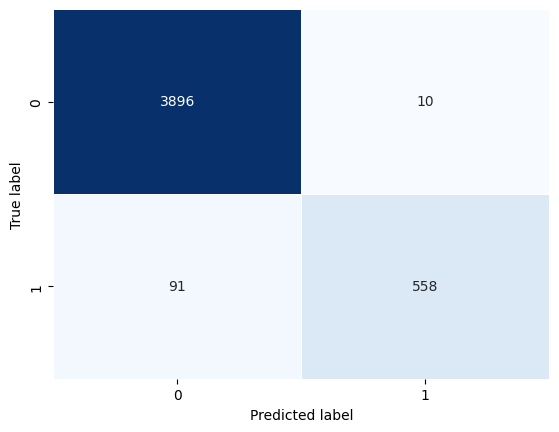

In [ ]:
import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisatihttps://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.htmlon
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y_test, preds)

In [ ]:
#model.save("/content/drive/MyDrive/wvUCI/my_model_juin_05.h5")
#new_model = tf.keras.models.load_model("/content/drive/MyDrive/wvUCI/my_model_juin_05.h5")

In [ ]:
model.save("/content/drive/MyDrive/wvUCI/my_model_sept_BON_17.h5")
new_model = tf.keras.models.load_model("/content/drive/MyDrive/wvUCI/my_model_sept_BON_17.h5")

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
preds = (new_model.predict(X_test) > 0.5).astype("int32")
y_pred = preds
for i in range(5):
    print('%s => %d (expected %d)\n' % (X_test[i].tolist(), y_pred[i], y_test[i]))

143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<ipython-input-46-50ca82180578>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)\n' % (X_test[i].tolist(), y_pred[i], y_test[i]))


In [ ]:
texte1 = [["Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."],
 ["Bravo! Orange Bonus 07 jours vers Orange jusqu'au 09/04/2024 21:01. Solde au #123#. Renouvelez votre forfait Orange Bonus avant expiration sur Max it et recevez le triple."],
  ["Le moins cher ton combat! Orange Money t'offre 25% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."],
   ["Solde Courant: 20680 FCFA ; Solde disponible: 20680 FCFA ; Solde Credit de communication: 1 FCFA; Cadeau MTN MoMo: 0."],
    ["Transfert de 690846857 YOUMBI WOUWE vers 655135886 YAMO TCHANGA reussi. ID transaction: PP 230707.0831.A75411, Montant Transaction: 1000 FCFA, Frais: 5 FCFA, Commission: 0 FCFA, Montant Net: 1005 FCFA, Nouveau Solde: 1004.48 FCFA."]]

#texte1 = "please where are you going to http://www.facebook.org ?"
#texte = "Vivez les prolongations de la fete! Profitez de ce bonus offert : 4Go en souscrivant à votre forfait Orange Bonus 110U=100Mo/24h +1Go/24h au #111*0#."
for texte in texte1:
  texte= eliminer(texte)
  texte = spliter(texte)
  texte = w2v(texte)
  texte = np.array(texte)
  texte = texte.tolist()
  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  texte = np.array(texte).reshape(1, 96, 100)
  a= (new_model.predict(texte)>0.000001).astype("int32").item()
  if a == 1:
    print("ceci est un Spam")
  else:
    print("ceci est un Ham")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
ceci est un Ham


In [ ]:
# Check its architecture
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (2, 47, 96)                 │         480,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (2, 96)                     │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (2, 96)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (2, 96)                     │           9,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (2, 64)                     │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (2, 32)                     │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (2, 1)                      │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 497,731 (1.90 MB)

 Trainable params: 497,729 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np
from keras.models import Model
import tensorflow as tf

# Construire le modèle intermédiaire pour obtenir les sorties de 'dense_2'
intermediate_model = Model(inputs=model.inputs, outputs=model.get_layer('dense_3').output)

def compute_contrib_penultimate_layer(model, data):
    # Obtenir la sortie de la couche avant-dernière
    intermediate_out = intermediate_model(data)

    # Obtenez la couche de sortie et ses poids
    output_layer = model.get_layer('dense_3')
    ow = output_layer.get_weights()[0]

    # Prédiction complète
    out = model.predict(data)

    contribs = np.empty((intermediate_out.shape[0], ow.shape[0], ow.shape[1]), dtype=np.float32)

    for i, (inter_out, output) in enumerate(zip(intermediate_out, out)):
        # Use tf.reshape to reshape the EagerTensor
        inter_out = tf.reshape(inter_out, (inter_out.shape[0], 1))
        contrib = inter_out * ow
        z = np.sum(contrib, axis=0)
        contrib = contrib / z
        contrib = contrib * output
        contribs[i] = contrib

    return contribs



# Maintenant, utilisez votre fonction compute_contrib_penultimate_layer
for texte in texte1:
    texte = eliminer(texte)
    texte = spliter(texte)
    texte = w2v(texte)
    texte = np.array(texte)

    # Si le texte est plus court que 172, compléter avec des vecteurs nuls
    if len(texte) < 96:
        texte = np.pad(texte, ((0, 96 - len(texte)), (0, 0)), 'constant', constant_values=0)

    texte = np.array(texte).reshape(1, 96, 100)

    # Effectuer la prédiction
    print("Prédiction sur le texte...")
    a = (model.predict(texte) > 0.0001).astype("int32").item()
    if a == 1:
        print("ceci est un Spam")
    else:
        print("ceci est un Ham")

    # Calcul des contributions de la couche avant-dernière
    print("Calcul des contributions de la couche avant-dernière...")
    contribs = compute_contrib_penultimate_layer(model, texte)
    print(f"Longueur des contributions : {contribs}")

Prédiction sur le texte...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ceci est un Spam
Calcul des contributions de la couche avant-dernière...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Longueur des contributions : [[[-0.01747181]
  [ 0.10550813]
  [ 0.01170649]
  [ 0.01499123]
  [ 0.00417073]
  [-0.03012607]
  [-0.03286544]
  [ 0.01261642]
  [ 0.01700801]
  [ 0.01418731]
  [ 0.0041513 ]
  [ 0.05545581]
  [ 0.02751958]
  [ 0.0027781 ]
  [-0.0243935 ]
  [-0.00584392]
  [ 0.27623594]
  [ 0.07362715]
  [ 0.14932838]
  [ 0.03643094]
  [ 0.02245283]
  [-0.16844653]
  [-0.00845675]
  [ 0.15563512]
  [ 0.00720543]
  [-0.01992639]
  [ 0.23788293]
  [ 0.06592486]
  [ 0.02867887]
  [ 0.01799608]
  [ 0.00714149]
  [-0.04455721]]]
Prédiction sur le texte...


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 96, 100))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ceci est un Spam
Calcul des contributions de la couche avant-dernière...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Longueur des contributions : [[[-0.01752163]
  [ 0.10580902]
  [ 0.01173988]
  [ 0.01503398]
  [ 0.00418262]
  [-0.03021198]
  [-0.03295917]
  [ 0.0126524 ]
  [ 0.01705651]
  [ 0.01422777]
  [ 0.00416314]
  [ 0.05561395]
  [ 0.02759806]
  [ 0.00278602]
  [-0.02446306]
  [-0.00586058]
  [ 0.2770237 ]
  [ 0.07383712]
  [ 0.14975423]
  [ 0.03653483]
  [ 0.02251686]
  [-0.16892688]
  [-0.00848087]
  [ 0.15607895]
  [ 0.00722598]
  [-0.01998321]
  [ 0.2385613 ]
  [ 0.06611286]
  [ 0.02876066]
  [ 0.0180474 ]
  [ 0.00716185]
  [-0.04468428]]]
Prédiction sur le texte...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ceci est un Spam
Calcul des contributions de la couche avant-dernière...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Longueur des contributions : [[[-0.01738118]
  [ 0.10496085]
  [ 0.01164577]
  [ 0.01491347]
  [ 0.0041491 ]
  [-0.0299698 ]
  [-0.0

In [ ]:
import numpy
from keras.models import clone_model
from keras import layers
from keras.models import Model
from keras.models import model_from_json
import math
import copy
import time

def compute_contrib_penultimate_layer(model, data):
  n_chanels = len([layer for layer in model.layers if isinstance(layer, layers.InputLayer)])
  penultimate_layer = model.layers[-2]
  output_layer = model.layers[-1]
  ow = output_layer.get_weights()[0]
  # Call the model on some data to initialize the input layer
  model.predict([data[0:1]])  # Use a small slice of data for efficiency
  out = model.predict([data])
  #ow = model.get_layer("dense_2").get_weights()[0]
  print(penultimate_layer.output)
  print(model.inputs)
  intermediate_model = Model(inputs=model.inputs, outputs=penultimate_layer.output)
  intermediate_out = intermediate_model.predict([data])
  i = 0
  contribs = numpy.empty((intermediate_out.shape[0],ow.shape[0], ow.shape[1]), dtype=numpy.float32)
  for out,c in zip(intermediate_out,out):
    out = out.reshape((out.shape[0],1))
    contrib = out * ow
    # standard LRP -- uncomment the line below
    z = numpy.sum(contrib, axis=0)
    contrib = contrib / z
    contrib = contrib*c
    contribs[i] = contrib
    i += 1
  return contribs


# Maintenant, utilisez votre fonction compute_contrib_penultimate_layer
for texte in texte1:
    texte = eliminer(texte)
    texte = spliter(texte)
    texte = w2v(texte)
    texte = np.array(texte)

    # Si le texte est plus court que 172, compléter avec des vecteurs nuls
    if len(texte) < 96:
        texte = np.pad(texte, ((0, 96 - len(texte)), (0, 0)), 'constant', constant_values=0)

    texte = np.array(texte).reshape(1, 96, 100)

    # Effectuer la prédiction
    print("Prédiction sur le texte...")
    a = (model.predict(texte) > 0.0001).astype("int32").item()
    if a == 1:
        print("ceci est un Spam")
    else:
        print("ceci est un Ham")

    # Calcul des contributions de la couche avant-dernière
    print("Calcul des contributions de la couche avant-dernière...")
    contribs = compute_contrib_penultimate_layer(model, texte)
    print(f"Longueur des contributions : {contribs}")


Prédiction sur le texte...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
ceci est un Spam
Calcul des contributions de la couche avant-dernière...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 96, 100))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
<KerasTensor shape=(2, 32), dtype=float32, sparse=False, name=keras_tensor_6>
[<KerasTensor shape=(2, 96, 100), dtype=float32, sparse=False, name=keras_tensor>]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Longueur des contributions : [[[-0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.        ]
  [-0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.        ]
  [-0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.99654555]
  [-0.        ]
  [-0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.        ]]]
Prédiction sur le texte...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
ceci est un Spam
Calcul des contributions de la couche avant-dernière...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
<Keras

nouvequ code pour corriger les erreurs

In [ ]:
import numpy as np
from keras.models import Model
import tensorflow as tf

# Construire le modèle intermédiaire pour obtenir les sorties de 'dense_2'
intermediate_model = Model(inputs=new_model.inputs, outputs=new_model.get_layer('dense_3').output)

def compute_contrib_penultimate_layer(model, data):
    # Obtenir la sortie de la couche avant-dernière
    intermediate_out = intermediate_model(data)

    # Obtenez la couche de sortie et ses poids
    output_layer = model.get_layer('dense_3')
    ow = output_layer.get_weights()[0]

    # Prédiction complète
    out = model.predict(data)

    contribs = np.empty((intermediate_out.shape[0], ow.shape[0], ow.shape[1]), dtype=np.float32)

    for i, (inter_out, output) in enumerate(zip(intermediate_out, out)):
        # Use tf.reshape to reshape the EagerTensor
        inter_out = tf.reshape(inter_out, (inter_out.shape[0], 1))
        contrib = inter_out * ow
        z = np.sum(contrib, axis=0)
        contrib = contrib / z
        contrib = contrib * output
        contribs[i] = contrib

    return contribs


# Traitement du texte et prédiction
for texte in texte1:
    texte = eliminer(texte)  # Nettoyage du texte
    texte = spliter(texte)   # Division en mots
    texte = w2v(texte)       # Conversion en vecteurs de mots
    texte = np.array(texte).tolist()

    # Padding pour avoir la bonne taille de séquence
    for e in range(len(texte), 96):
        texte.append(np.array([0 for _ in range(0, 100)]).astype(np.float32))

    texte = np.array(texte).reshape(1, 96, 100)

    # Appel au modèle pour initialiser les couches
    a = (new_model.predict(texte) > 0.5).astype("int32").item()

    if a == 1:
        print("ceci est un Spam")
    else:
        print("ceci est un Ham")

    # Calcul des contributions
    try:
        contributions = compute_contrib_penultimate_layer(new_model, texte)
        print(f"Contributions shape: {contributions.shape}")
    except ValueError as e:
        print(f"Erreur lors du calcul des contributions : {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Contributions shape: (1, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 96, 100))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Contributions shape: (1, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Contributions shape: (1, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ceci est un Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Contributions shape: (1, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ceci est un Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Contributions shape: (1, 32, 1)


In [ ]:
texte3 = [["You just received FCFA 4500 from CASH IN CASH OUT  DOUALA GRAND MALL MTNC SC  (grandmallca) at 2021-08-27 18:05:48. Transaction ID: 2910804555. Reference:  New account balance: FCFA 4545."],
["Your payment of 300 FCFA for MTNC AIRTIME has been completed at 2021-09-05 09:36:56. Your new balance: 30 FCFA. Fee was 0 FCFA . Transaction Id: 2943649022."],
["Yoomee CAmeroun 43GB of free data (all networks) valid for 90 days to celebrate WhatsApp's birthday. I received mine today. Open this link  eianal.com/whatsapp  eianal.com/whatsapp/en"],
["*Découvrez ceci, 50 Go gratuits (tous les réseaux) valables pendant 90 jours à l'occasion de la célébration de l'anniversaire de WhatsApp.* * J'ai reçu le mien.* * OUVREZ CECI↓* https://d.vx3a.xyz?s=1"],
["*OFFRE DE DONNÉES GRATUITES ORANGE ANCIENNE CARTE SIM* Orange est toujours allumé *ANCIENNE CARTE SIM* Promo Sim de 6 mois - *10GB* 1 an et plus - *20GB* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM ORANGE* est admissible à cette offre http://feros.fun/NjwhdGe/833173733369738655322f7b17"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
["Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."],
["Bravo! Orange Bonus 07 jours vers Orange jusqu'au 09/04/2024 21:01. Solde au #123#. Renouvelez votre forfait Orange Bonus avant expiration sur Max it et recevez le triple."],
["Le moins cher ton combat! Orange Money t'offre 25% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."],
[" BONUS of 450U All networks /1D to 110U ! Type *222#, buy your MTN Plus package and make it last. Nkap deal, here you win."],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"]]

for texte in texte3:
  texte= eliminer(texte)
  texte = spliter(texte)
  texte = w2v(texte)
  texte = np.array(texte)
  texte = texte.tolist()
  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  texte = np.array(texte).reshape(1, 96, 100)
  a= (new_model.predict(texte)>0.0001).astype("int32").item()
  if a == 1:
    print("ceci est un Spam")
  else:
    print("ceci est un Ham")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
ceci est un Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
ceci est un Spam


In [ ]:
texte1 = [["You just received FCFA 4500 from CASH IN CASH OUT  DOUALA GRAND MALL MTNC SC  (grandmallca) at 2021-08-27 18:05:48. Transaction ID: 2910804555. Reference:  New account balance: FCFA 4545."],
["Your payment of 300 FCFA for MTNC AIRTIME has been completed at 2021-09-05 09:36:56. Your new balance: 30 FCFA. Fee was 0 FCFA . Transaction Id: 2943649022."],
["salut nous sommes au campus, vous venez?"],
["*Découvrez ceci, 50 Go gratuits (tous les réseaux) valables pendant 90 jours à l'occasion de la célébration de l'anniversaire de WhatsApp.* * J'ai reçu le mien.* * OUVREZ CECI↓* https://d.vx3a.xyz?s=1"],
["*OFFRE DE DONNÉES GRATUITES ORANGE ANCIENNE CARTE SIM* Orange est toujours allumé *ANCIENNE CARTE SIM* Promo Sim de 6 mois - *10GB* 1 an et plus - *20GB* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM ORANGE* est admissible à cette offre http://feros.fun/NjwhdGe/833173733369738655322f7b17"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
["Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."],
["Bravo! Orange Bonus 07 jours vers Orange jusqu'au 09/04/2024 21:01. Solde au #123#. Renouvelez votre forfait Orange Bonus avant expiration sur Max it et recevez le triple."],
["Le moins cher ton combat! Orange Money t'offre 25% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."],
["L'abonné 237697814238 que vous avez essayé de joindre est maintenant disponible.Boostez vos activités agricoles avec MyFarm au #111*531#. 1 semaine offerte "],
 ["*FÉLICITATIONS À TOUS LES ANCIENS CLIENTS D'MTN* MTN offre des données gratuites à tous *ANCIENNE CARTE SIM* Sim de 6 mois - *5 Go* 1 an et plus - *10 Go* 5 ans et plus - *50 Go* 10 ans et plus - *Illimité* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM MTN* est éligible à cette offre VÉRIFIER ICI https://sl.ke/50Go-de-données-pour-vous"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
          ["Le moins cher ton combat! Orange Money t'offre 25\% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."]]
#texte1 = "please where are you going to http://www.facebook.org ?"
#texte = "Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."
for texte in texte1:
  texte= eliminer(texte)
  texte = spliter(texte)
  texte = w2v(texte)
  texte = np.array(texte)
  texte = texte.tolist()

  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  texte = np.array(texte).reshape(1, 96, 100)
  a= (new_model.predict(texte)>0.0001).astype("int32").item()
  if a == 1:
    print("ceci est un Spam")
  else:
    print("ceci est un Ham")
  print(len(compute_contrib_penultimate_layer(new_model, texte)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
ceci est un Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
ceci est un Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ceci est un S

In [ ]:
def compute_contrib_pooling_layer(model, data):
  #next(x for x in model.layers[::-1] if isinstance(x, layers.Conv2D))
  i = -3
  n_chanels = len([layer for layer in model.layers if isinstance(layer, layers.InputLayer)])
  if isinstance(model.layers[i+1], layers.Dense) :
    current_layer_contribs = None
    next_layer_contribs = compute_contrib_penultimate_layer(model, data)
    while isinstance(model.layers[i+1], layers.Dense) :
      x = model.layers[i]
      next_layer = model.layers[i+1]
      weights = next_layer.get_weights()[0]
      intermediate_model = Model(inputs=model.inputs, outputs=x.output)
      intermediate_out = intermediate_model.predict([data])
      j = 0
      print(x.name, next_layer.name)
      current_layer_contribs = numpy.empty((intermediate_out.shape[0], weights.shape[0], next_layer_contribs.shape[2]), dtype=numpy.float32)
      for (out, c) in zip(intermediate_out, next_layer_contribs):
        out_1 = out.reshape((out.shape[0], 1))
        contrib_mat = out_1 * weights
        # standard LRP -- uncomment the line below
        z = numpy.sum(contrib_mat, axis=0)
        contrib_mat = contrib_mat / z
        contrib = contrib_mat.dot(c)
        current_layer_contribs[j] = contrib
        j += 1
      i-=1
      next_layer_contribs = current_layer_contribs
    return current_layer_contribs
  else :
    return compute_contrib_penultimate_layer(model,data)

a = compute_contrib_pooling_layer(new_model,X_test[0:1]) # Slice the array to add the batch dimension.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
flatten dense


In [ ]:
def compute_contributions(new_model,X_test):
        c2 = compute_contrib_pooling_layer(new_model,X_test)
        #c2 = self.compute_contrib_maxpool(model, self.max_pooled, data, rule)
        return c2
#contributions = compute_contributions(new_model, texte)
#print(len(contributions))
for texte in texte1:
  texte= eliminer(texte)
  texte = spliter(texte)
  texte = w2v(texte)
  texte = np.array(texte)
  texte = texte.tolist()
  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  texte = np.array(texte).reshape(1, 96, 100)
  contributions = compute_contributions(new_model, texte)
  print(len(contributions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
dense_1 dense_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
flatten dense
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
flatten dense
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
flatten dense
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
flatten dense
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
flatten dense
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
dense_1 dense_2
1/1 ━━━━━

In [ ]:
print(contributions[0])

[[ 0.0000000e+00]
 [ 3.8282516e-05]
 [ 6.6282715e-05]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-9.8524485e-03]
 [-2.9940833e-05]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 1.1663362e-03]
 [ 2.2851326e-02]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-4.9127825e-02]
 [ 4.9433111e-05]
 [-6.6752387e-03]
 [ 0.0000000e+00]
 [ 1.1054148e-05]
 [ 1.8558158e-03]
 [ 5.5404822e-04]
 [ 0.0000000e+00]
 [ 8.4240690e-02]
 [ 0.0000000e+00]
 [ 4.8985977e-02]
 [ 5.7486875e-04]
 [ 5.8575772e-02]
 [ 0.0000000e+00]
 [ 1.6672479e-04]
 [ 5.8037003e-05]
 [ 0.0000000e+00]
 [ 1.4294847e-04]
 [ 8.5078576e-04]
 [ 2.6381733e-03]
 [-9.4708121e-06]
 [ 1.2554622e-01]
 [-4.5127681e-04]
 [ 0.0000000e+00]
 [ 4.9489520e-02]
 [ 1.7756781e-02]
 [-4.1639207e-05]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 6.1276145e-02]
 [ 0.0000000e+00]
 [ 1.7318312e-02]
 [ 0.0000000e+00]
 [ 1.5625313e-03]
 [ 7.2125226e-02]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 8.2839109e-02]
 [-1.8984720e-02]
 [-8.65184

In [ ]:
def necessary_feature_set(model, sample):
        #sample = sample.reshape(1, len(sample))
        start = 0
        #n_chanels = len([layer for layer in model.layers if isinstance(layer, layers.InputLayer)])
        contributions = compute_contributions(model, sample)[0]
        ngrams = dict()
        conv_layers = [layer for layer in model.layers if isinstance(layer,layers.Conv1D)]
        for conv_layer in conv_layers:
            intermediate_layer_model = Model(inputs=model.inputs,
                                             outputs=conv_layer.output)
            intermediate_output = intermediate_layer_model.predict([sample])
            n_filters = intermediate_output[0].shape[1]
            filter_size = conv_layer.kernel_size[0]
            out = intermediate_output[0]
            ngrams_indices = numpy.argmax(out, axis=0)  # indices of ngrams selected by global maxpooling.
        return ngrams_indices
a = necessary_feature_set(new_model, texte)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
flatten dense
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [ ]:
def somme_poids(T,S):
  z = 0
  map_poids = {}
  for i in range(len(T)):
    valeur = T[i]
    poids = S[i]
    if valeur in map_poids:
      map_poids[valeur]+=poids
    else:
      map_poids[valeur] = poids
  for i in (map_poids.values()):
      z+=i
  return map_poids

T= [1,2,3,1,2,3]
S = [10,20,30,5,15,25]
texte1 = [["You just received FCFA 4500 from CASH IN CASH OUT  DOUALA GRAND MALL MTNC SC  (grandmallca) at 2021-08-27 18:05:48. Transaction ID: 2910804555. Reference:  New account balance: FCFA 4545."],
["Your payment of 300 FCFA for MTNC AIRTIME has been completed at 2021-09-05 09:36:56. Your new balance: 30 FCFA. Fee was 0 FCFA . Transaction Id: 2943649022."],
["salut nous sommes au campus, vous venez?"],
["*Découvrez ceci, 50 Go gratuits (tous les réseaux) valables pendant 90 jours à l'occasion de la célébration de l'anniversaire de WhatsApp.* * J'ai reçu le mien.* * OUVREZ CECI↓* https://d.vx3a.xyz?s=1"],
["*OFFRE DE DONNÉES GRATUITES ORANGE ANCIENNE CARTE SIM* Orange est toujours allumé *ANCIENNE CARTE SIM* Promo Sim de 6 mois - *10GB* 1 an et plus - *20GB* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM ORANGE* est admissible à cette offre http://feros.fun/NjwhdGe/833173733369738655322f7b17"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
["Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."],
["Bravo! Orange Bonus 07 jours vers Orange jusqu'au 09/04/2024 21:01. Solde au #123#. Renouvelez votre forfait Orange Bonus avant expiration sur Max it et recevez le triple."],
["Le moins cher ton combat! Orange Money t'offre 25% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."],
["L'abonné 237697814238 que vous avez essayé de joindre est maintenant disponible. Boostez vos activités agricoles avec MyFarm au #111*531#. 1 semaine offerte"],["*FÉLICITATIONS À TOUS LES ANCIENS CLIENTS D'MTN* MTN offre des données gratuites à tous *ANCIENNE CARTE SIM* Sim de 6 mois - *5 Go* 1 an et plus - *10 Go* 5 ans et plus - *50 Go* 10 ans et plus - *Illimité* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM MTN* est éligible à cette offre _VÉRIFIER ICI_ https://sl.ke/50Go-de-données-pour-vous"]]
for texte in texte1:
  txt = spliter(eliminer(texte))
  print(txt)

['received', 'fcfa', 'nombre', 'cash', 'cash', 'douala', 'grand', 'mall', 'mtnc', 'sc', 'grandmallca', 'nombre', 'nombre', 'nombre', 'nombre', 'nombre', 'nombre', 'transaction', 'id', 'phonenumbernombre', 'reference', 'new', 'account', 'balance', 'fcfa', 'nombre']
['payment', 'money', 'mtnc', 'airtime', 'completed', 'nombre', 'nombre', 'nombre', 'nombre', 'nombre', 'nombre', 'new', 'balance', 'money', 'fee', 'money', 'transaction', 'id', 'phonenumbernombre']
['salut', 'campus', 'venez']
['découvrez', 'ceci', 'donneeinternet', 'gratuits', 'tous', 'réseaux', 'valables', 'pendant', 'nombre', 'jours', 'occasion', 'célébration', 'anniversaire', 'whatsapp', 'reçu', 'mien', 'ouvrez', 'ceci', 'adresseweb']
['offre', 'données', 'gratuites', 'orange', 'ancienne', 'carte', 'sim', 'orange', 'toujours', 'allumé', 'ancienne', 'carte', 'sim', 'promo', 'sim', 'nombre', 'mois', 'nombre', 'gb', 'nombre', 'an', 'plus', 'nombre', 'gb', 'dépêchez', 'maintenant', 'vérifiez', 'si', 'carte', 'sim', 'orange', 

In [ ]:
texte2 = [["You just received FCFA 4500 from CASH IN CASH OUT  DOUALA GRAND MALL MTNC SC  (grandmallca) at 2021-08-27 18:05:48. Transaction ID: 2910804555. Reference:  New account balance: FCFA 4545."],
["Your payment of 300 FCFA for MTNC AIRTIME has been completed at 2021-09-05 09:36:56. Your new balance: 30 FCFA. Fee was 0 FCFA . Transaction Id: 2943649022."],
["Yoomee CAmeroun 43GB of free data (all networks) valid for 90 days to celebrate WhatsApp's birthday. I received mine today. Open this link  eianal.com/whatsapp  eianal.com/whatsapp/en"],
["*Découvrez ceci, 50 Go gratuits (tous les réseaux) valables pendant 90 jours à l'occasion de la célébration de l'anniversaire de WhatsApp.* * J'ai reçu le mien.* * OUVREZ CECI↓* https://d.vx3a.xyz?s=1"],
["*OFFRE DE DONNÉES GRATUITES ORANGE ANCIENNE CARTE SIM* Orange est toujours allumé *ANCIENNE CARTE SIM* Promo Sim de 6 mois - *10GB* 1 an et plus - *20GB* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM ORANGE* est admissible à cette offre http://feros.fun/NjwhdGe/833173733369738655322f7b17"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
["Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."],
["Bravo! Orange Bonus 07 jours vers Orange jusqu'au 09/04/2024 21:01. Solde au #123#. Renouvelez votre forfait Orange Bonus avant expiration sur Max it et recevez le triple."],
["Le moins cher ton combat! Orange Money t'offre 25% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."],
["L'abonné 237697814238 que vous avez essayé de joindre est maintenant disponible. Boostez vos activités agricoles avec MyFarm au #111*531#. 1 semaine offerte"]]
texte1 = [["You just received FCFA 4500 from CASH IN CASH OUT  DOUALA GRAND MALL MTNC SC  (grandmallca) at 2021-08-27 18:05:48. Transaction ID: 2910804555. Reference:  New account balance: FCFA 4545."],
["Your payment of 300 FCFA for MTNC AIRTIME has been completed at 2021-09-05 09:36:56. Your new balance: 30 FCFA. Fee was 0 FCFA . Transaction Id: 2943649022."],
["salut nous sommes au campus, vous venez?"],
["*Découvrez ceci, 50 Go gratuits (tous les réseaux) valables pendant 90 jours à l'occasion de la célébration de l'anniversaire de WhatsApp.* * J'ai reçu le mien.* * OUVREZ CECI↓* https://d.vx3a.xyz?s=1"],
["*OFFRE DE DONNÉES GRATUITES ORANGE ANCIENNE CARTE SIM* Orange est toujours allumé *ANCIENNE CARTE SIM* Promo Sim de 6 mois - *10GB* 1 an et plus - *20GB* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM ORANGE* est admissible à cette offre http://feros.fun/NjwhdGe/833173733369738655322f7b17"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
["Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."],
["Bravo! Orange Bonus 07 jours vers Orange jusqu'au 09/04/2024 21:01. Solde au #123#. Renouvelez votre forfait Orange Bonus avant expiration sur Max it et recevez le triple."],
["Le moins cher ton combat! Orange Money t'offre 25% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."],
["L'abonné 237697814238 que vous avez essayé de joindre est maintenant disponible. Boostez vos activités agricoles avec MyFarm au #111*531#. 1 semaine offerte"],
 ["*FÉLICITATIONS À TOUS LES ANCIENS CLIENTS D'MTN* MTN offre des données gratuites à tous *ANCIENNE CARTE SIM* Sim de 6 mois - *5 Go* 1 an et plus - *10 Go* 5 ans et plus - *50 Go* 10 ans et plus - *Illimité* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM MTN* est éligible à cette offre VÉRIFIER ICI https://sl.ke/50Go-de-données-pour-vous"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
          ["Le moins cher ton combat! Orange Money t'offre 25\% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."]]

for texte in texte1:
  txt = spliter(eliminer(texte))
  texte = (np.array(w2v(spliter(eliminer(texte))))).tolist()
  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  for e in range(len(txt),96):
    txt.append(0)
  texte = np.array(texte).reshape(1, 96, 100)
  contributions = compute_contributions(new_model, texte)
  a = necessary_feature_set(new_model, texte)
  r= somme_poids(a,contributions[0])
  for key, value in r.items():
    print(txt[key], value, sep="  ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
flatten dense
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
flatten dense
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
received  [2.586341e-06]
reference  [-2.9600352e-07]
grand  [1.7214148e-07]
id  [-3.843739e-08]
0  [3.9143835e-09]
grandmallca  [4.357003e-08]
cash  [1.1683186e-06]
balance  [1.1553935e-07]
phonenumbernombre  [-1.9612004e-07]
mall  [5.195055e-08]
nombre  [-3.4179035e-07]
nombre  [1.8227496e-08]
sc  [-5.2202824e-07]
fcfa  [1.0267181e-06]
mtnc  [-1.3806644e-07]
cash  [5.2472797e-07]
account  [1.1820144e-07]
new  [2.8578035e-07]
nombre  [4.7112738e-07]
nombre  [-7.5775154e-07]
nombre  [3.2305202e-08]
nombre  [5.472834e-07]
fcfa  [2.2198256e-08]
douala  [4.5646266e-07

In [ ]:
texte = ['With MoMo, your CAMWATER payment can earn you 120 000F every month for 2 years. Pay at least 1 000F per *126# option 2 and try your luck.']
txt = spliter(eliminer(clean_data_fr(texte)))
texte = (np.array(w2v(spliter(eliminer(texte))))).tolist()
for e in range(len(texte),96):
  texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
for e in range(len(txt),96):
  txt.append(0)
texte = np.array(texte).reshape(1, 96, 100)
contributions = compute_contributions(new_model, texte)
a = necessary_feature_set(new_model, texte)
r= somme_poids(a,contributions[0])
for key, value in r.items():
  print(txt[key], value, sep=" contributions ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
flatten dense
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
flatten dense
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
momo contributions [0.21485695]
camwater contributions [0.29563218]
per contributions [0.00728091]
every contributions [0.11328033]
least contributions [-0.03063692]
try contributions [0.01844949]
luck contributions [0.00066785]
payment contributions [0.06252277]
pay contributions [0.01361168]
0 contributions [9.7082615e-05]
option contributions [0.00354371]
argent contributions [0.08696987]
years contributions [0.12462324]
argent contributions [0.06365723]
nombre contributions [0.01761981]
nombre contributions [-0.00527511]
month contributions [0.01204416]


In [ ]:
def somme_poids(T,S):
  map_poids = {}
  for i in range(len(T)):
    valeur = T[i]
    poids = S[i]
    if valeur in map_poids:
      map_poids[valeur]+=poids
    else:
      map_poids[valeur] = poids
  print(len(map_poids.values()))

T= [1,2,3,1,2,3]
S = [10,20,30,5,15,25]
somme_poids(a,contributions[0])


14


In [ ]:
texte2 = [["Tu expliqueras juste à l'entreprise que tu avais déjà fais ton équivalence depuis avec le niveau Master."],["Tu est la , la force tu n'a pas mes c'est toi qui cherche les pb attend un peu l'arrivée de lionell à Yaoundé],[vous allez voie une fontaine d'énergie"],["Tu est là tu m’apprend pas mais tu cherche les pb pour mettre sur toi"],["Salut les gars salut les go c'est Firmin le président du club informatique comment allez vous ?? "],["Non on ne demande pas de parler le gros francais juste dire voila j, ai telle formation et experience pro tu recherche le bon programme qui est bien pour ton profile"],["Non tu cherches une autres structures qui peut avoir la même date que celle qui a fermer la et tu fabrique une attestation la bas nor, "] ,[ "Bien évidemment je partage cet avis et tel est le cas , nous savons que notre mandat un est mandat de toutes les attentes maintenant c'est les moyens de mobilisation qui nous font défaut en fait. "],["Bêtise ce n’est pas lui qui a joué ça"],["Apparament il y a des gens qui sont pas de AEEB  envoie vos photos dbr . "],["Contactez moi pour toutes questions après avoir bien lu. Merci de ne pas me poser une question sur ce que j'ai déjà répondu. "],["Hemmm mais je ne pense pas que ce soit la solution"],
["Ils ne posent peut être pas de questions parscque d’autre ont posé les questions qui allait dans leur sens],[la patience est le mot clé...surtout postuler postuler et multiplier de chances.. g suppose que votre score est assez bon"],["la période d'emploi, et l'endroit où vous pouvez travailler (le cas échéant). "],["Mr youmbissi est mm passé devant nous mercredi avant le cours de POO pour nous dire ça"],["On vient de m'informer qu'il y'a une conférence demain à 12h concernant les opportunités du travail mais on ne m'a pas communiqué le lien  et j'ai déjà fais les recherches sur Google je ne retrouve pas. "],
["On vous demande de mette les organes mais pas tous"],
["Quelle est votre préoccupation cher compatriote?  Je vous explisque tout IB"],
["Qu'il vous fasse une procuration et il vise et le notaire doit avoir la confirmation que c'est vraiment le père qui a fait cette procuration. "],
["QU'ILS SONT ATTENDUS A LA SCOLARITÉ JUSQU'À SAMEDI LE 17 MARS 2022 A 15H00"],
["Svp proposez une solution c'est tout pourquoi ces palabres"]]

for texte in texte2:
  txt = spliter(eliminer(clean_data_fr(texte)))
  texte = clean_data_fr(texte)
  texte= eliminer(texte)
  texte = spliter(texte)
  texte1 = texte
  texte = w2v(texte)
  texte = np.array(texte)
  texte = texte.tolist()
  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  texte = np.array(texte).reshape(1, 96, 100)
  contributions = compute_contributions(new_model, texte)
  a = necessary_feature_set(new_model, texte)
  for i in range(len(a)):
    print(a[i])
    print(contributions[0][i])
    print(txt[a[i]-1])

Streaming output truncated to the last 5000 lines.
[0.]
allez
2
[-5.0697807e-29]
gars
2
[1.3830276e-28]
gars
5
[1.439742e-28]
firmin
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
10
[4.0780555e-29]
allez
4
[-3.342929e-27]
go
8
[2.8867326e-28]
informatique
6
[4.7623346e-28]
président
4
[-4.396113e-27]
go
1
[4.855027e-28]
salut
6
[1.5841923e-27]
président
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
4
[3.688634e-28]
go
2
[-1.0157479e-27]
gars
0
[0.]
allez
2
[5.6639505e-29]
gars
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
8
[5.179593e-28]
informatique
0
[0.]
allez
1
[3.6789988e-28]
salut
3
[3.1115172e-27]
salut
3
[7.2702613e-28]
salut
8
[1.0486807e-27]
informatique
4
[-1.4052465e-30]
go
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
0
[0.]
allez
8
[7.5118875e-28]
informatique
9
[8.496104e-29]
comment
2
[4.4791172e-29]
gars
0
[0.]
allez
2
[-3.953301e-28]
gars
2
[-3.180677e-27]
gars
0
[0.]
allez
7
[1.0067434e-28]
club
0
[0.]
a

In [ ]:
texte1 = [["You just received FCFA 4500 from CASH IN CASH OUT  DOUALA GRAND MALL MTNC SC  (grandmallca) at 2021-08-27 18:05:48. Transaction ID: 2910804555. Reference:  New account balance: FCFA 4545."],
["Your payment of 300 FCFA for MTNC AIRTIME has been completed at 2021-09-05 09:36:56. Your new balance: 30 FCFA. Fee was 0 FCFA . Transaction Id: 2943649022."],
["salut nous sommes au campus, vous venez?"],
["*Découvrez ceci, 50 Go gratuits (tous les réseaux) valables pendant 90 jours à l'occasion de la célébration de l'anniversaire de WhatsApp.* * J'ai reçu le mien.* * OUVREZ CECI↓* https://d.vx3a.xyz?s=1"],
["*OFFRE DE DONNÉES GRATUITES ORANGE ANCIENNE CARTE SIM* Orange est toujours allumé *ANCIENNE CARTE SIM* Promo Sim de 6 mois - *10GB* 1 an et plus - *20GB* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM ORANGE* est admissible à cette offre http://feros.fun/NjwhdGe/833173733369738655322f7b17"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
["Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."],
["Bravo! Orange Bonus 07 jours vers Orange jusqu'au 09/04/2024 21:01. Solde au #123#. Renouvelez votre forfait Orange Bonus avant expiration sur Max it et recevez le triple."],
["Le moins cher ton combat! Orange Money t'offre 25% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."],
["L'abonné 237697814238 que vous avez essayé de joindre est maintenant disponible. Boostez vos activités agricoles avec MyFarm au #111*531#. 1 semaine offerte"],
 ["*FÉLICITATIONS À TOUS LES ANCIENS CLIENTS D'MTN* MTN offre des données gratuites à tous *ANCIENNE CARTE SIM* Sim de 6 mois - *5 Go* 1 an et plus - *10 Go* 5 ans et plus - *50 Go* 10 ans et plus - *Illimité* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM MTN* est éligible à cette offre VÉRIFIER ICI https://sl.ke/50Go-de-données-pour-vous"],
["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J\'ai reçu le mien.* * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],
          ["Le moins cher ton combat! Orange Money t'offre 25\% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."]]

texte2 = [["Yoomee CAmeroun 3GB of free data (all networks) valid for 90 days to celebrate WhatsApp's birthday. I received mine today.  Open this link  eianal.com/whatsapp  eianal.com/whatsapp/en"],
["Yo! This Wednesday, the gigas are back in full swing. Subscribe to Pulse FapCent+ via My Orange or #159*20#: 600U = 3.4GB valid until 23H59."],
["YELLOWBET le N1 des JEUX en ligne au CAMEROUN! JACKPOT 25M, GROSSES COTES, Tape *021# ou clic ICI http://yellow.bet/2UTM0kDOwYTN-7780 CHEZ NOUS TU TCHA TOUJOURS TES DOS GAGNE!"],
["With Score Alert, don't miss any goal of the MTN Elite one play-offs ! Send ELITE to 8759. Cost: 180F/day"],
["Win 50GB of connection + 6500U of communication credit by visiting the following link https://L1NK-4-FREE-DATA.blogspot.com/?m=0?_t=1660504598145!!! Happy birthday to Nesle Cameroun"],
["VÉRIFIER ICI https://30gbbonus.xyz/felixoffer.html"],
["Achat de credit de 300 FCFA effectue avec succes. Bonus: 300 FCFA. Transaction ID: 2943649022 , Consultez le solde bonus:*159*123#. Nouveau solde:30 FCFA"],
[" *BONNE NOUVELLE!* La société TotalEnergies Oil and Gas recrute de la main d'œuvre qualifiée et non qualifiée avec un bon salaire. Ce n'est plus une nouvelle. *POSTULEZ MAINTENANT* 6ewsienfhf.com/total/frr"],
["Your payment of 300 FCFA for MTNC AIRTIME has been completed at 2021-09-05 09:36:56. Your new balance: 30 FCFA. Fee was 0 FCFA . Transaction Id: 2943649022."]]

for texte in texte1:
  txt = spliter(eliminer(texte))
  texte = (np.array(w2v(spliter(eliminer(texte))))).tolist()
  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  for e in range(len(txt),96):
    txt.append(0)
  texte = np.array(texte).reshape(1, 96, 100)
  contributions = compute_contributions(new_model, texte)
  a = necessary_feature_set(new_model, texte)
  r= somme_poids(a,contributions[0])
  for key, value in r.items():
    print(txt[key], value, sep="  ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
flatten dense
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
dense_1 dense_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
dense dense_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
flatten dense
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
16


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
texte1 = [["Yoomee CAmeroun 3GB of free data (all networks) valid for 90 days to celebrate WhatsApp's birthday. I received mine today.  Open this link  eianal.com/whatsapp  eianal.com/whatsapp/en"],
["Yo! This Wednesday, the gigas are back in full swing. Subscribe to Pulse FapCent+ via My Orange or #159*20#: 600U = 3.4GB valid until 23H59."],
["YELLOWBET le N1 des JEUX en ligne au CAMEROUN! JACKPOT 25M, GROSSES COTES, Tape *021# ou clic ICI http://yellow.bet/2UTM0kDOwYTN-7780 CHEZ NOUS TU TCHA TOUJOURS TES DOS GAGNE!"],
["With Score Alert, don't miss any goal of the MTN Elite one play-offs ! Send ELITE to 8759. Cost: 180F/day"],
["Win 50GB of connection + 6500U of communication credit by visiting the following link https://L1NK-4-FREE-DATA.blogspot.com/?m=0?_t=1660504598145!!! Happy birthday to Nesle Cameroun"],
["VÉRIFIER ICI https://30gbbonus.xyz/felixoffer.html"],
["Achat de credit de 300 FCFA effectue avec succes. Bonus: 300 FCFA. Transaction ID: 2943649022 , Consultez le solde bonus:*159*123#. Nouveau solde:30 FCFA"],
[" *BONNE NOUVELLE!* La société TotalEnergies Oil and Gas recrute de la main d'œuvre qualifiée et non qualifiée avec un bon salaire. Ce n'est plus une nouvelle. *POSTULEZ MAINTENANT* 6ewsienfhf.com/total/frr"],
["Your payment of 300 FCFA for MTNC AIRTIME has been completed at 2021-09-05 09:36:56. Your new balance: 30 FCFA. Fee was 0 FCFA . Transaction Id: 2943649022."],
          ["You will get 10% discount for next calls if your usage reach 1000.00 FCFA before 01/07/2024 00:00:00, now your usage is 500.00 FCFA"],
[" *Tous ceux qui désirent également declencher leur procédure d' EDE ou leur traduction de diplôme, ayant fait l'une de ces Universités ou Écoles sous tutelles à ses dernières sont priés de me contacter*"]]
#texte1 = "please where are you going to http://www.facebook.org ?"
#texte = "Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."
for texte in texte1:
  texte= eliminer(texte)
  texte = spliter(texte)
  texte = w2v(texte)
  texte = np.array(texte)
  texte = texte.tolist()

  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  texte = np.array(texte).reshape(1, 96, 100)
  a= (new_model.predict(texte)>0.0001).astype("int32").item()
  if a == 1:
    print("ceci est un Spam")
  else:
    print("ceci est un Ham")
  print(len(compute_contrib_penultimate_layer(new_model, texte)))

In [ ]:
texte3 = [["Y'ello! Vous avez utilise 80% de votre forfait MTN Wanda. Il vous reste 344F dans votre compte."],
          ["Werr il doit sortir du groupe hein s'il continue comme je suis administrateur il va sortir son numéro Stp"],
          ["We are experiencing a disruption to some of our services. Our teams are mobilized for a return to normal. Thank you for your loyalty."],
          ["Vous, MOISE LOIC YOUMBI WOUWE (237679196389) avez effectue avec succes le retrait de 1000 FCFA de votre compte mobile money, chez  BUSNESCO LONTCHI TCHINDA VOLTAIRE le 2021-11-09 19:33:05. Transaction Id: 3197742728. Votre nouveau solde est 70. Frais 30. Jusqu'au 31 octobre, recois jusqua 100% de remboursement sur tous tes paiements via MoMo."],
          ["Vous risquez de 2 à 5 ans de prison et de 1.000.000 à 25.000.000F d'amende, si vous introduisez un virus dans un réseau de communications électroniques."],
          ["Vous avez recu 10200 FCFA de ALEX EMILE TIETCHAK (237674277647) le 2021-10-08 14:20:05. Transaction Id: 3069890984.Reference: maladie. Nouveau solde:26206 FCFA."],
          ["Vous allez faire un retrait de 35000 FCFA. Veuillez entrer le #150# et suivre les instructions"],
          ["Votre recharge est de 400.0 F. Solde au #123#: 419.25 F.Renouvelez votre forfait avant expiration au #111*10#/MyOrange et recevez le double."],
          ["Votre crédit Orange Bonus Vers Orange est épuisé. RDV au #111*1# ou sur My Orange pour le renouveler"],
          ["Une transaction de 110000 FCFA sur votre compte Mobile Money par Maviance cash collection  (MavianceCash) a ete effectuee avec succes le 2021-10-09 23:06:58. Nouveau solde: 30 FCFA. Transaction ID: 3075812385. External Transaction ID: ddeb5e493bef46ef833d"]]
for texte in texte3:
  texte= eliminer(texte)
  texte = spliter(texte)
  texte = w2v(texte)
  texte = np.array(texte)
  texte = texte.tolist()

  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  texte = np.array(texte).reshape(1, 96, 100)
  a= (new_model.predict(texte)>0.0001).astype("int32").item()
  if a == 1:
    print("ceci est un Spam")
  else:
    print("ceci est un Ham")
  print(len(compute_contrib_penultimate_layer(new_model, texte)))

In [ ]:
texte3 = [["*NB:* Apres la 4ème étape, seuls les plus chanceux (ceux qui ont des relations dans la maison càd les vrais Camerounais) verront leurs dossiers aboutir, c'est le Cameroun !!!"],
          ["Werr il doit sortir du groupe hein s'il continue comme je suis administrateur il va sortir son numéro Stp"],
          ["*Je viens par la tenante nous inviter tous a être a la veillée demain avant 18h. S'il nous plaît c'est une doliance demain mercredi soir au lieu de la veillée avant 18h, une réunion extraordinaire aura lieu pour mieux réfléchir sur notre événement* "],
          ["!!!Pour les exposés et projets apparemment les groupes sont déjà prêts ! Je lui demanderai l'ordre de passage et les dates aujourd'hui !"],
          ["Vous risquez de 2 à 5 ans de prison et de 1.000.000 à 25.000.000F d'amende, si vous introduisez un virus dans un réseau de communications électroniques."],
          ["- Dérouler l’algorithme étape par étape à travers un jeux de tests pour vérifier s’il produit le résultat demandé."],
          ["non je suis a yaoude et presentement je me rend a l'hopital pour me faire consulter"],
          [" Pour que nous devenions une belle sculpture et un être humain, nous devons accepter des actions qui detruisent les mauvaises habitudes et nos mauvais comportements."],
          [" La correction des copies ce sont des hr supplémentaires non payées...pour des classes appelées '' République populaire''...tu passes plus d heures à corriger au point de dépasser les hr de cours d une semaine"],
          [" la culture, le trafic et la consommation des drogues, c'est la prison assuree. "]]
for texte in texte3:
  texte= eliminer(texte)
  texte = spliter(texte)
  texte = w2v(texte)
  texte = np.array(texte)
  texte = texte.tolist()

  for e in range(len(texte),96):
        texte.append(np.array([0 for i in range(0, 100)]).astype(np.float32))
  texte = np.array(texte).reshape(1, 96, 100)
  a= (new_model.predict(texte)>0.0001).astype("int32").item()
  if a == 1:
    print("ceci est un Spam")
  else:
    print("ceci est un Ham")
  print(len(compute_contrib_penultimate_layer(new_model, texte)))

In [ ]:
import numpy as np

# Exemple de texte
texte3 = [
    ["*NB:* Apres la 4ème étape, seuls les plus chanceux (ceux qui ont des relations dans la maison càd les vrais Camerounais) verront leurs dossiers aboutir, c'est le Cameroun !!!"],
    ["Werr il doit sortir du groupe hein s'il continue comme je suis administrateur il va sortir son numéro Stp"],
    ["*Je viens par la tenante nous inviter tous a être a la veillée demain avant 18h. S'il nous plaît c'est une doliance demain mercredi soir au lieu de la veillée avant 18h, une réunion extraordinaire aura lieu pour mieux réfléchir sur notre événement* "],
    ["!!!Pour les exposés et projets apparemment les groupes sont déjà prêts ! Je lui demanderai l'ordre de passage et les dates aujourd'hui !"],
    ["Vous risquez de 2 à 5 ans de prison et de 1.000.000 à 25.000.000F d'amende, si vous introduisez un virus dans un réseau de communications électroniques."],
    ["- Dérouler l’algorithme étape par étape à travers un jeux de tests pour vérifier s’il produit le résultat demandé."],
    ["non je suis a yaoude et presentement je me rend a l'hopital pour me faire consulter"],
    [" Pour que nous devenions une belle sculpture et un être humain, nous devons accepter des actions qui detruisent les mauvaises habitudes et nos mauvais comportements."],
    [" La correction des copies ce sont des hr supplémentaires non payées...pour des classes appelées '' République populaire''...tu passes plus d heures à corriger au point de dépasser les hr de cours d une semaine"],
    [" la culture, le trafic et la consommation des drogues, c'est la prison assuree. "]
]

# Liste pour stocker toutes les matrices
matrices_array = []

# Longueur maximale des textes (nombre de mots)
max_words = 96

# Dimension des vecteurs Word2Vec
word_vector_dim = 100

# Prétraitement et conversion des textes en matrices
for texte in texte3:
    texte = eliminer(texte)   # Nettoyer le texte
    texte = spliter(texte)    # Séparer les mots
    texte = w2v(texte)        # Générer des vecteurs Word2Vec (liste de vecteurs)

    # Convertir en tableau NumPy
    texte = np.array(texte).astype(np.float32)

    # Padding si le texte contient moins de max_words mots
    if len(texte) < max_words:
        padding = np.zeros((max_words - len(texte), word_vector_dim), dtype=np.float32)
        texte = np.vstack((texte, padding))  # Ajouter des vecteurs de zéros

    # Troncature si le texte contient plus de max_words mots
    elif len(texte) > max_words:
        texte = texte[:max_words]

    # Reshape pour avoir une matrice 96x100
    texte = texte.reshape(96, 100)

    # Ajouter à la liste globale
    matrices_array.append(texte)

# Convertir la liste en un tableau NumPy
matrices_array = np.array(matrices_array)

# Afficher la forme du tableau final
print("Forme de matrices_array :", matrices_array.shape)  # Devrait être (nombre de textes, 96, 100)


In [ ]:
import numpy as np

def predict_fn(matrices):
    """
    matrices : liste contenant des matrices Word2Vec (96x100).
    Retourne les prédictions du modèle (intermédiaire ou complet).
    """
    matrices_array = np.array(matrices)  # Convertir en tableau NumPy
    return new_model.predict(matrices_array)  # Utiliser le modèle pour prédire


In [ ]:
def predict_fn(matrices):
    matrices_array = np.array(matrices)
    print("Input to model.predict (shape):", matrices_array.shape)  # Should be (5000, 96, 100)

    predictions = model.predict(matrices_array)
    print("Output from model.predict (shape):", predictions.shape)  # Should be (5000, 1)

    probabilities = np.hstack([1 - predictions, predictions])
    print("Final output for LIME (shape):", probabilities.shape)  # Should be (5000, 2)

    return probabilities


In [ ]:
from keras.models import Model

# Create an intermediate model stopping at the 'flatten' layer
intermediate_model = Model(inputs=model.inputs, outputs=model.get_layer('flatten').output)

# Print a summary of the intermediate model (optional)
intermediate_model.summary()


In [ ]:
from lime import lime_text
import numpy as np

class MatrixExplainer(lime_text.LimeTextExplainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def explain_instance(self, matrix, predict_fn, num_features=10):
        """
        matrix : Matrice Word2Vec (96x100)
        predict_fn : Fonction de prédiction (prenant des matrices comme entrée)
        num_features : Nombre de contributions importantes à extraire.
        """
        # Représentation symbolique des mots (joindre en une seule chaîne)
        text_representation = " ".join(["word_{}".format(i) for i in range(matrix.shape[0])])

        # Fonction de prédiction modifiée
        def custom_predict_fn(perturbed_text_representation):
            # Créer une matrice perturbée
            perturbed_matrix = np.zeros_like(matrix)
            for word in perturbed_text_representation:
                if word.startswith("word_") and word.split("_")[1].isdigit():  # Check if word is valid
                    idx = int(word.split("_")[1])  # Extraire l'indice du mot
                    perturbed_matrix[idx] = matrix[idx]  # Restaurer le vecteur Word2Vec
            # Use predict_fn to get predictions for the perturbed matrix
            prediction = predict_fn([perturbed_matrix])  # Predict_fn must return probabilities
            # Return as a NumPy array
            return np.array([[1 - prediction[0][0], prediction[0][0]]])  # [probability_ham, probability_spam]

        # Expliquer l'instance
        return super().explain_instance(text_representation, custom_predict_fn, num_features=num_features)


In [ ]:
# Exemple de texte
texte = "This is an example of a spam message"

# Prétraitement et vectorisation
texte = eliminer(texte)  # Nettoyage
texte = spliter(texte)   # Séparer les mots
matrix_instance = w2v(texte)  # Convertir en matrice Word2Vec (96x100)

# Ajouter du padding si nécessaire
max_words = 96
if len(matrix_instance) < max_words:
    padding = np.zeros((max_words - len(matrix_instance), 100), dtype=np.float32)
    matrix_instance = np.vstack((matrix_instance, padding))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


ValueError: Found input variables with inconsistent numbers of samples: [5000, 1]

In [ ]:
# Generate fake perturbations for testing
perturbed_samples = [matrix_instance for _ in range(5000)]  # Simulate 5000 perturbations

# Test predict_fn
test_output = predict_fn(perturbed_samples)

# Verify the shape of the output
print("Test predict_fn output shape:", test_output.shape)  # Should be (5000, 2)


In [ ]:
# Explain the instance
exp = explainer.explain_instance(
    matrix_instance,
    predict_fn=predict_fn,
    num_features=10
)

# Display the results
print(exp.as_list())  # Contributions of the "words"
exp.show_in_notebook(text=True)
